# Eco Inference
Once your data has been run through `Eco prep.ipynb` and exported to a .csv file, run it through this notebook to perform ecological infernce on it. This notebook uses the RxC model in order to keep track of the voting patterns of several groups.

### Imports

Run the following cell to import the Python libraries numpy and pandas that we will use for our data setup, an import classes that enable PyEI's core functionality. You only need to run this cell once per session.

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd

from pyei.two_by_two import TwoByTwoEI
from pyei.goodmans_er import GoodmansER
from pyei.goodmans_er import GoodmansERBayes
from pyei.r_by_c import RowByColumnEI

#import data from the Prepared_4_Eco_Inference folder
state_native_areas_added_results_added = pd.read_csv("Prepared_4_Eco_Inference/SouthDakota.csv")

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


## Formatting our data 

In [2]:
state_native_areas_added_results_added

,Unnamed: 0,native_american_perc,perc_trump,G20PRERTRU,NAME,G20PREDBID,perc_biden,total_votes,mixed_native_american_perc,white_alone_perc,other
0,0,0.038337,0.572464,1738,Precinct RC 3-4,1298,0.427536,3036,0.021256,0.867147,0.073259
1,1,0.053273,0.631114,1716,Precinct RC 1-3,1003,0.368886,2719,0.024778,0.853397,0.068553
2,2,0.105728,0.615942,1275,Precinct RC 1-2,795,0.384058,2070,0.041990,0.773686,0.078596
3,3,0.173618,0.522180,1236,Precinct RC 2-4,1131,0.477820,2367,0.049120,0.683503,0.093760
4,4,0.295844,0.476190,60,Precinct RC 2-1,66,0.523810,126,0.058680,0.533007,0.112469
...,...,...,...,...,...,...,...,...,...,...,...
732,732,0.034002,0.711565,523,Precinct 05 Sentinel Hill,212,0.288435,735,0.026155,0.910201,0.029643
733,733,0.033898,0.692873,943,Precinct HC,418,0.307127,1361,0.026316,0.820696,0.119090
734,734,0.013554,0.725532,341,Precinct 04 Pringle,129,0.274468,470,0.015060,0.938253,0.033133
735,735,0.008901,0.704462,963,Precinct 09 Bear Rock,404,0.295538,1367,0.025654,0.932984,0.032461


In [3]:

#Creates an arry of target demographic groups
group_fractions_rbyc = np.array(state_native_areas_added_results_added[['native_american_perc', 'mixed_native_american_perc', 'white_alone_perc', 'other']]).T

#Creates an array of target candidates
votes_fractions_rbyc = np.array(state_native_areas_added_results_added[['perc_biden', 'perc_trump']]).T

# total votes
precinct_pops = np.array(state_native_areas_added_results_added['total_votes']).astype(int)

In [4]:
print(group_fractions_rbyc)

[[0.03833745 0.05327276 0.10572782 ... 0.01355422 0.00890052 0.03797468]
 [0.02125641 0.02477803 0.04198966 ... 0.01506024 0.02565445 0.04810127]
 [0.86714747 0.85339665 0.77368648 ... 0.93825301 0.93298429 0.86835443]
 [0.07325868 0.06855255 0.07859604 ... 0.03313253 0.03246073 0.04556962]]


In [5]:
#Group entry names
candidate_names_rbyc = ["Biden", "Trump"]
demographic_group_names_rbyc = ["Native", "White-Native Mixed", "White Single Race", "Other"]
precinct_names = state_native_areas_added_results_added['NAME']

# Run RxC analysis



In [6]:
# Fitting a first r x c model

# Create a RowByColumnEI objectS
ei_rbyc = RowByColumnEI(model_name='multinomial-dirichlet')

# Fit the model and run the eco inference
ei_rbyc.fit(group_fractions_rbyc,
       votes_fractions_rbyc,
       precinct_pops,
       demographic_group_names=demographic_group_names_rbyc,
       candidate_names=candidate_names_rbyc,
       precinct_names=precinct_names,
       chains=4
)


/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/pyei/r_by_c.py:151: UserWarning: Precinct names are not unique. This may interfere with passing precinct names to precinct_level_plot().
  warnings.warn(


Running ['Native', 'White-Native Mixed', 'White Single Race', 'Other'] x ['Biden', 'Trump'] EI
r = 4 rows (demographic groups)
c = 2 columns (candidates or voting outcomes)
number of precincts = 737


Compiling.. :   0%|          | 0/2500 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/2500 [00:02<?, ?it/s]





Running chain 0:   5%|▌         | 125/2500 [00:23<06:49,  5.81it/s]


Running chain 0:  10%|█         | 250/2500 [00:32<04:04,  9.21it/s]


Running chain 0:  15%|█▌        | 375/2500 [00:37<02:48, 12.60it/s]



Running chain 0:  20%|██        | 500/2500 [00:44<02:17, 14.56it/s]

Running chain 0:  30%|███       | 750/2500 [00:53<01:27, 19.98it/s]

Running chain 0:  35%|███▌      | 875/2500 [00:57<01:14, 21.92it/s]



Running chain 0:  40%|████      | 1000/2500 [01:08<01:26, 17.25it/s]

Running chain 0:  45%|████▌     | 1125/2500 [01:15<01:19, 17.38it/s]


Running chain 0:  50%|█████     | 1250/2500 [01:22<01:12, 17.17it/s]


Running chain 0:  55%|█████▌    | 1375/2500 [01:32<01:10, 15.91it/s]


Running chain 0:  60%|██████    | 1500/2500 [01:42<01:09, 14.30it/s]



Running chain 0:  65%|██████▌   | 1625/2500 [01:51<01:00, 14.35it/s]


Running chain 0:  70%|███████  

#### Printing a report of what was found

In [7]:
# Generate a simple report to summarize the results
print(ei_rbyc.summary())


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                Native for Biden is
                0.736
                95% equal-tailed credible interval:  [0.69945044 0.76880373]
                The posterior mean for the district-level voting preference of
                Native for Trump is
                0.264
                95% equal-tailed credible interval:  [0.23119627 0.30054956]
                The posterior mean for the district-level voting preference of
                White-Native Mixed for Biden is
                0.112
                95% equal-tailed credible interval:  [0.03812089 0.26081319]
                The posterior mean for the district-level voting preference of
                White-Native Mixed for Trump is
                0.888
     

## Plot Creation

array([<Axes: title={'center': 'Support for Biden'}>,
       <Axes: title={'center': 'Support for Trump'}>], dtype=object)

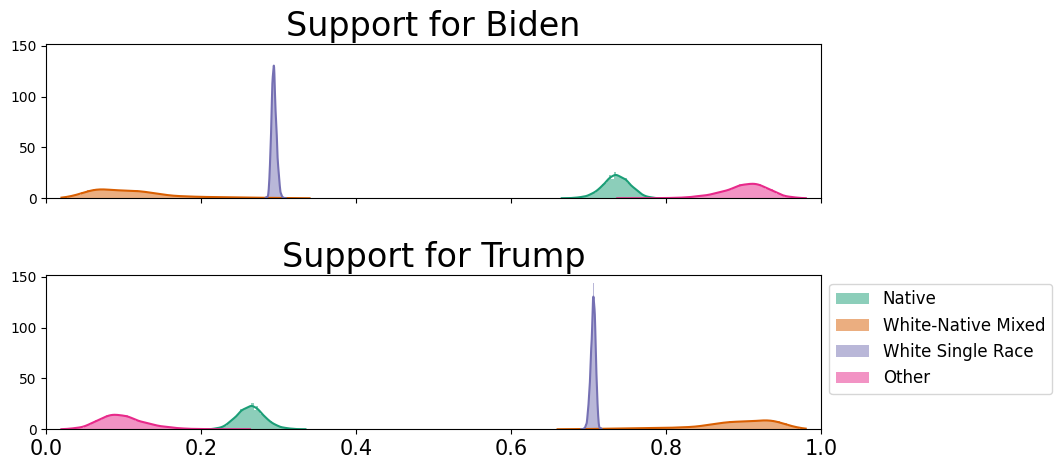

In [8]:
ei_rbyc.plot_kdes()

array([<Axes: title={'center': 'Support among Native'}>,
       <Axes: title={'center': 'Support among White-Native Mixed'}>,
       <Axes: title={'center': 'Support among White Single Race'}, ylabel='Probability Density'>,
       <Axes: title={'center': 'Support among Other'}>], dtype=object)

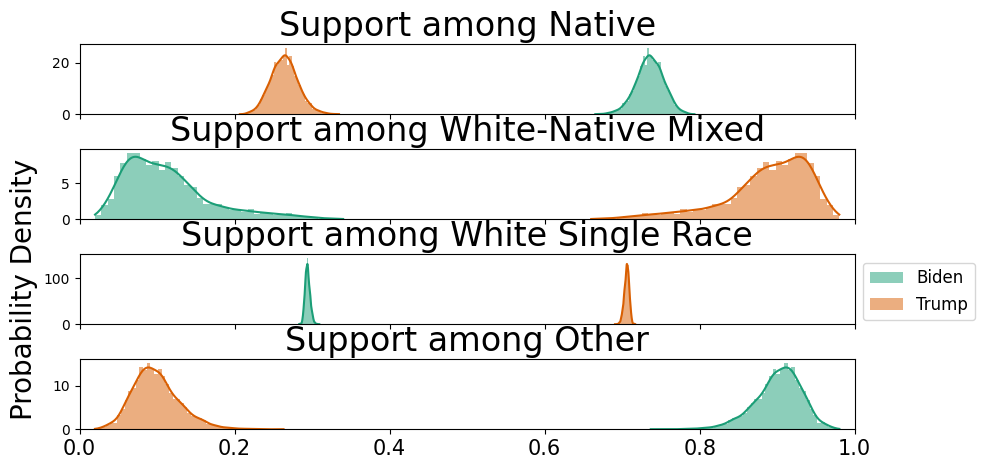

In [9]:
ei_rbyc.plot_kdes(plot_by="group")

/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/pyei/plot_utils.py:346: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=samples_df, orient="h", whis=[2.5, 97.5], ax=ax, palette=colors)
/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/pyei/plot_utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=TICKSIZE)
/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/pyei/plot_utils.py:346: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=samples_df, orient="h", whis=[2.5, 97.5], ax=ax, palette=colors)
/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/pyei/plot_utils.py:69: UserWarning:

<Axes: title={'center': 'Support among Other'}>

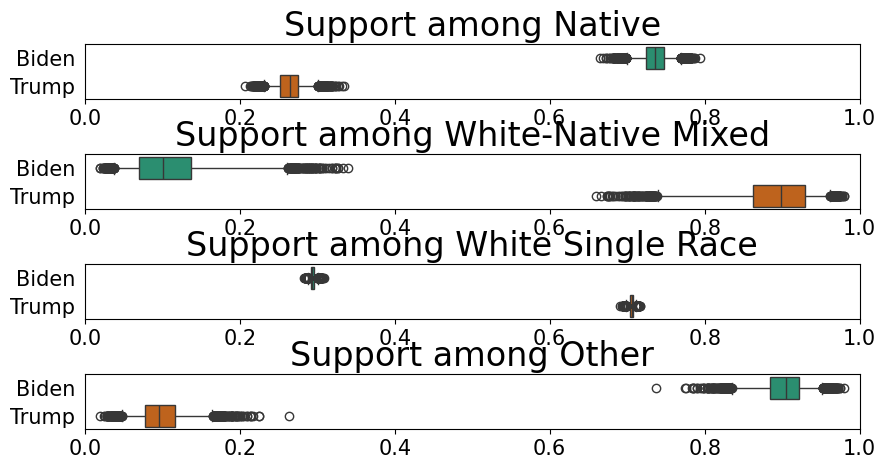

In [10]:
ei_rbyc.plot_boxplots(plot_by="group")

<Axes: title={'center': 'Polarization KDE for Trump'}, xlabel='(Native - White Single Race) support for Trump', ylabel='Density'>

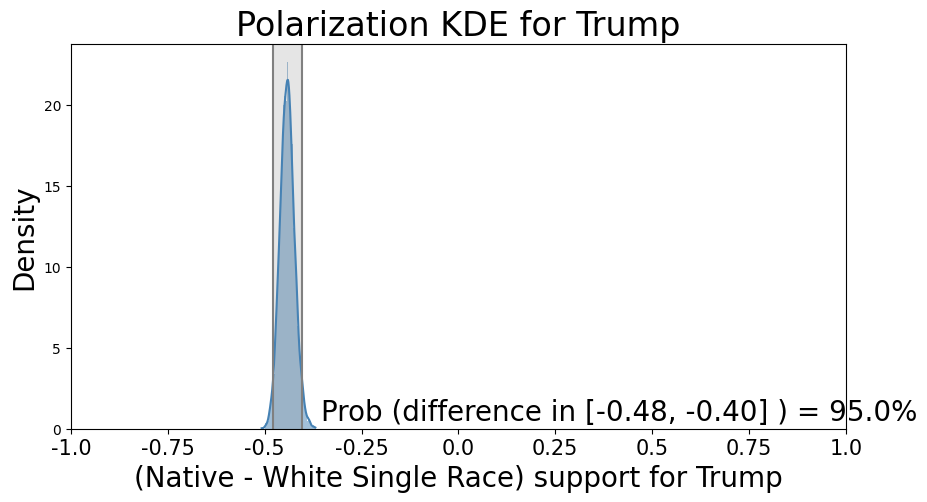

In [11]:
ei_rbyc.plot_polarization_kde(percentile=95, groups=['Native', 'White Single Race'], candidate='Trump', show_threshold=True)

<Axes: title={'center': 'Polarization KDE for Trump'}, xlabel='(White-Native Mixed - White Single Race) support for Trump', ylabel='Density'>

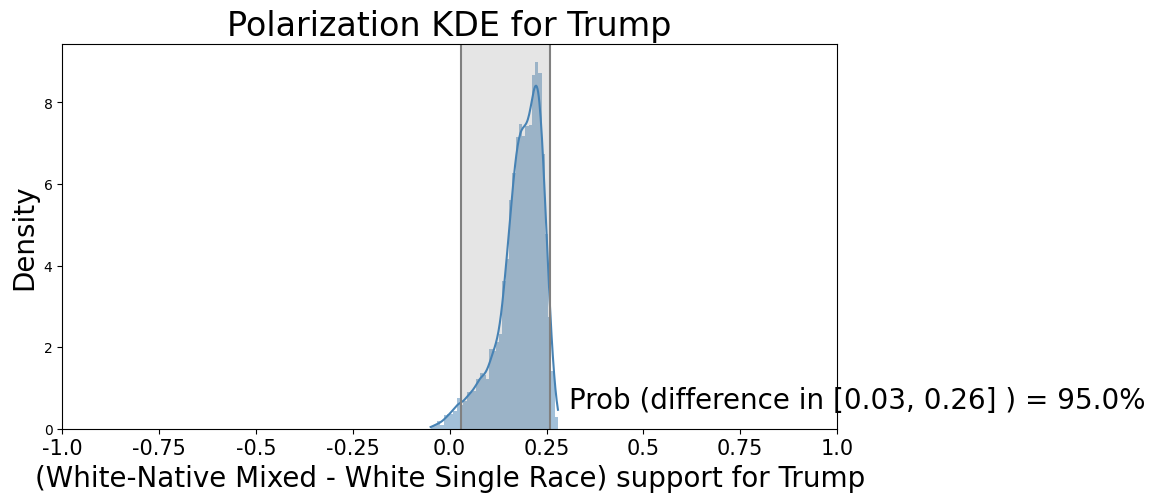

In [12]:
ei_rbyc.plot_polarization_kde(percentile=95, groups=['White-Native Mixed', 'White Single Race'], candidate='Trump', show_threshold=True)

<Axes: title={'center': 'Polarization KDE for Trump'}, xlabel='(White-Native Mixed - Native) support for Trump', ylabel='Density'>

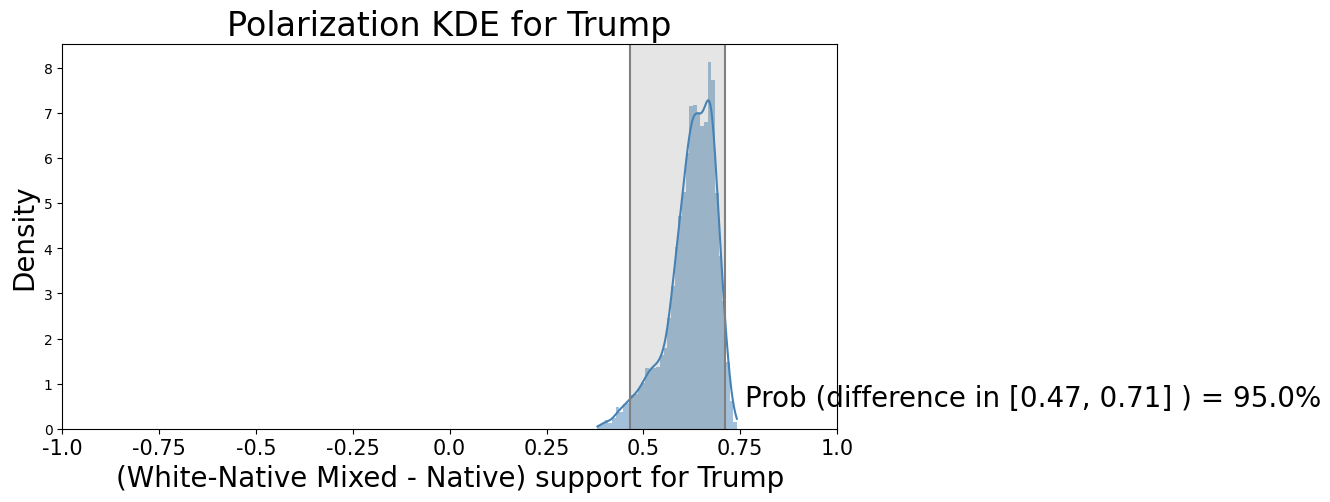

In [13]:
ei_rbyc.plot_polarization_kde(percentile=95, groups=['White-Native Mixed', 'Native'], candidate='Trump', show_threshold=True)